In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split


In [4]:
data = pd.read_csv('train.csv')
target = pd.read_csv('test.csv')


In [28]:
data.head(1)

,Unnamed: 0,product_id,cat_id,live_rate,score_mean,score_count,price_group,discount_percentage,sold_count,year,month,day
0,0,11260680,120456,0.625,4.2484,306.0,116.0,10.0,0.0,2018,6,30


In [27]:
target.head(10)

,Unnamed: 0,date,product_id,cat_id,live_rate,score_mean,score_count,price_group,discount_percentage,sold_count
0,0,2018-09-08,12236797,117271,1.0,3.8571,7.0,138.0,43.0,0.0
1,1,2018-09-08,4521955,117739,1.0,4.2390,799.0,120.0,0.0,11.0
2,2,2018-09-08,4597769,117757,1.0,4.3514,407.0,126.0,0.0,0.0
3,3,2018-09-08,4603875,117741,1.0,4.3726,518.0,124.0,0.0,0.0
4,4,2018-09-08,4654632,120133,1.0,4.3077,52.0,131.0,11.0,0.0
5,5,2018-09-08,4672148,120128,1.0,4.1918,146.0,116.0,0.0,0.0
6,6,2018-09-08,4672157,120128,1.0,4.3021,288.0,119.0,0.0,0.0
7,7,2018-09-08,4672281,120128,1.0,4.0814,86.0,115.0,0.0,0.0
8,8,2018-09-08,4672285,120128,1.0,4.3095,420.0,115.0,0.0,0.0
9,9,2018-09-08,4685530,117362,1.0,4.0128,78.0,140.0,0.0,0.0


In [6]:
data.corr()

,Unnamed: 0,product_id,cat_id,live_rate,score_mean,score_count,price_group,discount_percentage,sold_count
Unnamed: 0,1.000000,0.025892,-0.001482,-0.013321,0.014137,0.027123,0.031464,0.021064,0.015172
product_id,0.025892,1.000000,-0.066965,0.036217,-0.113323,-0.264546,0.136288,0.063646,-0.052273
cat_id,-0.001482,-0.066965,1.000000,-0.141398,0.089215,-0.016902,-0.240579,-0.180918,0.063507
live_rate,-0.013321,0.036217,-0.141398,1.000000,-0.021279,-0.041713,0.073599,0.021332,-0.018833
score_mean,0.014137,-0.113323,0.089215,-0.021279,1.000000,0.125097,-0.102519,-0.083163,0.077291
score_count,0.027123,-0.264546,-0.016902,-0.041713,0.125097,1.000000,-0.019726,-0.045552,0.342910
price_group,0.031464,0.136288,-0.240579,0.073599,-0.102519,-0.019726,1.000000,0.092489,-0.126328
discount_percentage,0.021064,0.063646,-0.180918,0.021332,-0.083163,-0.045552,0.092489,1.000000,-0.133188
sold_count,0.015172,-0.052273,0.063507,-0.018833,0.077291,0.342910,-0.126328,-0.133188,1.000000


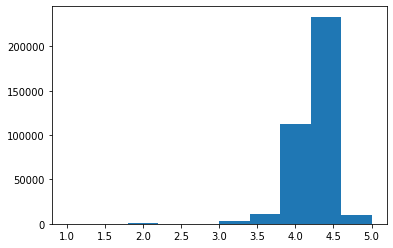

In [7]:
plt.hist(data['score_mean']);

In [11]:
data['date'] = pd.to_datetime(data['date'])
# data
data['year']= data['date'].dt.year
data['month']= data['date'].dt.month
data['day']= data['date'].dt.day
data = data.drop('date',axis=1)
data

,Unnamed: 0,product_id,cat_id,live_rate,score_mean,score_count,price_group,discount_percentage,sold_count,year,month,day
0,0,11260680,120456,0.625000,4.2484,306.0,116.0,10.0,0.0,2018,6,30
1,1,4422878,120439,0.608695,4.3027,598.0,111.0,3.0,5.0,2018,6,30
2,2,4429950,121410,1.000000,3.9568,879.0,134.0,32.0,0.0,2018,6,30
3,3,4430741,118147,1.000000,4.2335,394.0,121.0,0.0,0.0,2018,6,30
4,4,4431882,120456,1.000000,4.1695,236.0,116.0,0.0,0.0,2018,6,30
...,...,...,...,...,...,...,...,...,...,...,...,...
387020,387020,9978653,121074,1.000000,4.4562,708.0,133.0,0.0,16.0,2018,9,7
387021,387021,9984121,117810,1.000000,4.1921,781.0,127.0,20.0,0.0,2018,9,7
387022,387022,9984781,117746,1.000000,4.2227,229.0,125.0,20.0,0.0,2018,9,7
387023,387023,9989789,120438,1.000000,4.2155,283.0,116.0,0.0,3.0,2018,9,7


In [12]:
X = data.drop(['sold_count', 'Unnamed: 0', 'product_id', 'cat_id'], axis=1)
y = data['sold_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train

,live_rate,score_mean,score_count,price_group,discount_percentage,year,month,day
163263,1.000000,4.2243,1257.0,115.0,11.0,2018,7,27
96912,1.000000,4.2500,32.0,123.0,0.0,2018,7,16
314167,1.000000,4.1633,49.0,117.0,13.0,2018,8,24
99362,1.000000,4.1736,749.0,107.0,13.0,2018,7,16
38609,0.434782,4.2687,67.0,120.0,0.0,2018,7,6
...,...,...,...,...,...,...,...,...
259178,1.000000,4.0769,26.0,129.0,15.0,2018,8,13
365838,1.000000,3.9434,53.0,114.0,6.0,2018,9,3
131932,1.000000,4.2126,127.0,123.0,29.0,2018,7,21
146867,1.000000,3.4444,18.0,138.0,20.0,2018,7,24


In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232215 entries, 163263 to 121958
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   live_rate            232215 non-null  float64
 1   score_mean           223272 non-null  float64
 2   score_count          232215 non-null  float64
 3   price_group          232215 non-null  float64
 4   discount_percentage  232215 non-null  float64
 5   year                 232215 non-null  int64  
 6   month                232215 non-null  int64  
 7   day                  232215 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 15.9 MB


In [14]:
X_train

,live_rate,score_mean,score_count,price_group,discount_percentage,year,month,day
163263,1.000000,4.2243,1257.0,115.0,11.0,2018,7,27
96912,1.000000,4.2500,32.0,123.0,0.0,2018,7,16
314167,1.000000,4.1633,49.0,117.0,13.0,2018,8,24
99362,1.000000,4.1736,749.0,107.0,13.0,2018,7,16
38609,0.434782,4.2687,67.0,120.0,0.0,2018,7,6
...,...,...,...,...,...,...,...,...
259178,1.000000,4.0769,26.0,129.0,15.0,2018,8,13
365838,1.000000,3.9434,53.0,114.0,6.0,2018,9,3
131932,1.000000,4.2126,127.0,123.0,29.0,2018,7,21
146867,1.000000,3.4444,18.0,138.0,20.0,2018,7,24


In [15]:
from sklearn.impute import SimpleImputer

le = SimpleImputer(missing_values=np.nan, strategy='median')
x_tr = le.fit_transform(X_train)
x_ts = le.fit_transform(X_test)
m = pd.DataFrame(x_tr, columns=X_train.columns)
ms = pd.DataFrame(x_ts, columns=X_test.columns)
X_train = m
X_test = ms

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232215 entries, 0 to 232214
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   live_rate            232215 non-null  float64
 1   score_mean           232215 non-null  float64
 2   score_count          232215 non-null  float64
 3   price_group          232215 non-null  float64
 4   discount_percentage  232215 non-null  float64
 5   year                 232215 non-null  float64
 6   month                232215 non-null  float64
 7   day                  232215 non-null  float64
dtypes: float64(8)
memory usage: 14.2 MB


In [20]:
X_train = X_train.drop('year', axis=1)
X_test = X_test.drop('year', axis=1)

In [22]:
X_train.head()


,live_rate,score_mean,score_count,price_group,discount_percentage,month,day
0,1.000000,4.2243,1257.0,115.0,11.0,7.0,27.0
1,1.000000,4.2500,32.0,123.0,0.0,7.0,16.0
2,1.000000,4.1633,49.0,117.0,13.0,8.0,24.0
3,1.000000,4.1736,749.0,107.0,13.0,7.0,16.0
4,0.434782,4.2687,67.0,120.0,0.0,7.0,6.0


In [25]:
X_train.corr()

,live_rate,score_mean,score_count,price_group,discount_percentage,month,day
live_rate,1.000000,-0.019239,-0.044078,0.073460,0.020509,0.008570,-0.045252
score_mean,-0.019239,1.000000,0.121379,-0.094427,-0.078743,0.013211,0.003366
score_count,-0.044078,0.121379,1.000000,-0.017509,-0.042643,0.027205,0.004570
price_group,0.073460,-0.094427,-0.017509,1.000000,0.091421,0.025335,0.011174
discount_percentage,0.020509,-0.078743,-0.042643,0.091421,1.000000,-0.013328,0.072783
month,0.008570,0.013211,0.027205,0.025335,-0.013328,1.000000,-0.289799
day,-0.045252,0.003366,0.004570,0.011174,0.072783,-0.289799,1.000000


In [32]:
from sklearn.linear_model import LinearRegression

lrm = LinearRegression()
lrm.fit(X_train, y_train)
y_pred = lrm.predict(X_test)
lrm.score(X_test, y_test)

0.15120075624055707

In [28]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)


0.6658900876013607

In [33]:
y_predic = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.6658900876013607

In [38]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred, y_test)
mser = mean_squared_error(y_predic, y_test)

print('mse Regression: %d'  % mse)
print('mse RandomForest: %d'% mser)

mse Regression: 160
mse RandomForest: 63
